In [10]:
import numpy as np
from timeit import default_timer as timer
import matplotlib.pyplot as plt
%matplotlib inline

def plot_complexity(func, title = 'Algorithm'):
    data = {
        'length of list':[], 
        'time taken': []
    }
    
    for i in range(1, 12):
        arr = np.random.randint(0, 1000*i, 1000*i)
        
        start = timer()
        func(arr)
        end = timer()
        
        print(f'Sorted {1000*i} elements in {end-start}s')
        
        data['length of list'].append(1000*i)
        data['time taken'].append(end-start)
        
    plt.plot(data['length of list'], data['time taken'], label=title)
    plt.title(title)
    plt.xlabel('Length of array')
    plt.ylabel('Time taken')
        
#     plt.plot(data['length of list'], , label = 'O(n^2)')
    plt.legend()

## Selection Sort

In [3]:
def selection_sort(arr):
    swaps = 0
    for l in range(0, len(arr)-1):    #
        key_index = l
        
        # searching for min/max element
        for i in range(l+1, len(arr)):
            if arr[key_index] >= arr[i]:
                key_index = i
        else:
            # swapping 
            arr[l], arr[key_index] = arr[key_index], arr[l]
            swaps += 1
    
    #print(swaps)
    return arr

# selection_sort()

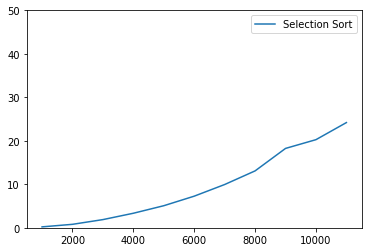

In [16]:
plot_complexity(selection_sort, title = 'Selection Sort')

## Insertion Sort

In [38]:
def insertion_sort(list):
    for index in range(1,len(list)):
        key = list[index]
        previousIndex = index - 1
        while list[previousIndex] > key and previousIndex >= 0:
            # swapping position
            temp = key
            list[previousIndex+1] = list[previousIndex]
            list[previousIndex] = temp
            previousIndex -= 1

    return list

print([29,10,14,37,13,3])
insertion_sort([29,10,14,37,13,3])

[29, 10, 14, 37, 13, 3]


[3, 10, 13, 14, 29, 37]

In [41]:
import numpy as np
%timeit insertion_sort(np.random.randint(0,1000, 10000))

20.8 s ± 1.05 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


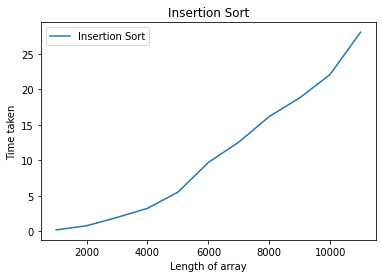

In [16]:
plot_complexity(insertion_sort, title='Insertion Sorbt')

## Quick Sort

In [26]:
def quick_sort(arr, lower_bound, upper_bound):
    
    # base case
    if upper_bound - lower_bound <= 1:
        return arr
    
    # pivot is the first element
    pivot = arr[lower_bound]
    left = lower_bound + 1
    right = upper_bound
    
    # partitioning subroutine, O(n)
    while left<=right:
        if arr[left] < pivot:
            left += 1
        elif arr[right] >= pivot:
            right -= 1
        else:
            # swapping
            arr[left], arr[right] = arr[right], arr[left]
            left += 1
            right -= 1
            
    # swapping the pivot with the "right" index, now the pivot is in its "sorted"/"final" position
    arr[lower_bound], arr[right] = arr[right], arr[lower_bound]
    
    pivot_index = right

    # recursively solving for both/all the sublists
    quick_sort(arr, lower_bound, pivot_index-1);         # 1st half/branch
    quick_sort(arr, pivot_index+1, upper_bound);         # 2nd half/branch
    
    return arr
    
arr = [3,44,38,5,47,15,36,26,27,2,46,4,19,50,48]
quick_sort(arr, 0, len(arr)-1)

[2, 3, 4, 5, 15, 19, 27, 26, 36, 38, 44, 46, 47, 50, 48]

Sorted 1000 elements in 0.01221129999976256s
Sorted 2000 elements in 0.022807800000009593s
Sorted 3000 elements in 0.031390299999657145s
Sorted 4000 elements in 0.031627800000023853s
Sorted 5000 elements in 0.0386754999999539s
Sorted 6000 elements in 0.0526703999998972s
Sorted 7000 elements in 0.056989899999734916s
Sorted 8000 elements in 0.07792019999988042s
Sorted 9000 elements in 0.08177639999985331s
Sorted 10000 elements in 0.08848029999990104s
Sorted 11000 elements in 0.11621849999983169s
Sorted 12000 elements in 0.11894130000018777s
Sorted 13000 elements in 0.161435800000163s
Sorted 14000 elements in 0.15314730000000054s
Sorted 15000 elements in 0.2934731999998803s
Sorted 16000 elements in 0.16785440000012386s
Sorted 17000 elements in 0.18742250000013883s
Sorted 18000 elements in 0.17777580000029047s
Sorted 19000 elements in 0.24134010000034323s
Sorted 20000 elements in 0.1977944000000207s
Sorted 21000 elements in 0.2713971000002857s
Sorted 22000 elements in 0.21627399999988484s


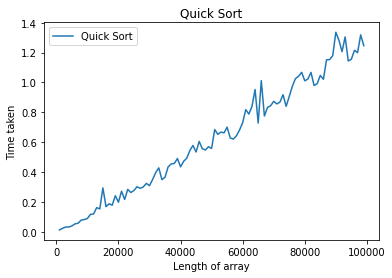

In [37]:
import numpy as np
from timeit import default_timer as timer
import matplotlib.pyplot as plt
%matplotlib inline

def plot_complexity_quick_sort():
    title = 'Quick Sort'
    data = {
        'length of list':[], 
        'time taken': []
    }
    
    for i in range(1, 100):
        arr = np.random.randint(0, 1000*i, 1000*i)
        
        start = timer()
        quick_sort(arr,0, len(arr)-1)
        end = timer()
        
        print(f'Sorted {1000*i} elements in {end-start}s')
        
        data['length of list'].append(1000*i)
        data['time taken'].append(end-start)
        
    plt.plot(data['length of list'], data['time taken'], label=title)
    plt.title(title)
    plt.xlabel('Length of array')
    plt.ylabel('Time taken')
    plt.legend()
    
plot_complexity_quick_sort()

In [43]:
import numpy as np 
%timeit quick_sort(np.random.randint(0,1000,10000), 0, 9999)

113 ms ± 3.21 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


(0.0, 50.0)

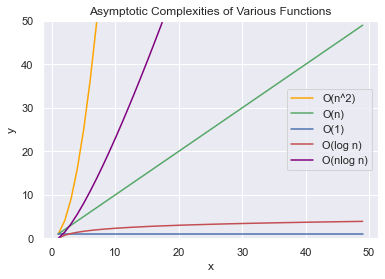

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
x = np.arange(1,50)

sns.set_theme()

plt.plot(x,x**2,color='orange', label='O(n^2)')
plt.plot(x,x,color='g', label='O(n)')
plt.plot(x,[1]*len(x),color='b', label='O(1)')
plt.plot(x,np.log(x),color='r', label='O(log n)')
plt.plot(x, x*np.log(x), color = 'purple', label='O(nlog n)')

plt.title('Asymptotic Complexities of Various Functions')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.ylim([0,50])

## Matrix dot Product & Strassen Matrix Mutiplication

### Iterative Method

In [5]:
def iterative_dot_product(matrix, order):
    c = []
    for i in range(order):
        row= []
        
        for j in range(order):
            element = 0;
            
            for k in range(order):
                element += matrix[i][k]*matrix[k][j]
            
            row.append(element)
        
        c.append(row)
    return c

a = [[1,2,3],[4,5,6]]
iterative_dot_product(a, len(a))

[[9, 12], [24, 33]]

In [19]:
import numpy as np 
%timeit iterative_dot_product(np.random.randint(0,1000,(256,256), 256)    # around 62k elements

17.6 s ± 400 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Completed Dot product of 10 x 10 matrix in 0.0011411000000407512s
Completed Dot product of 20 x 20 matrix in 0.009522900000320078s
Completed Dot product of 30 x 30 matrix in 0.040461900000082096s
Completed Dot product of 40 x 40 matrix in 0.07526590000043143s
Completed Dot product of 50 x 50 matrix in 0.1426753999999164s
Completed Dot product of 60 x 60 matrix in 0.2438403000001017s
Completed Dot product of 70 x 70 matrix in 0.37903370000003633s
Completed Dot product of 80 x 80 matrix in 0.6228292999999212s
Completed Dot product of 90 x 90 matrix in 0.8917216999998345s
Completed Dot product of 100 x 100 matrix in 1.522650099999737s
Completed Dot product of 110 x 110 matrix in 1.858813999999711s
Completed Dot product of 120 x 120 matrix in 2.0668281000002935s
Completed Dot product of 130 x 130 matrix in 2.4772917999998754s
Completed Dot product of 140 x 140 matrix in 3.346391600000061s
Completed Dot product of 150 x 150 matrix in 4.066251600000214s
Completed Dot product of 160 x 160 mat

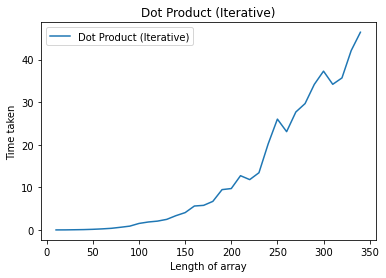

In [23]:
import numpy as np
from timeit import default_timer as timer
import matplotlib.pyplot as plt
%matplotlib inline

def plot_complexity_iterative_dot_product():
    title = 'Dot Product (Iterative)'
    data = {
        'Size of Matrix':[], 
        'time taken': []
    }
    
    for i in range(1, 35):
        arr = np.random.randint(0, 1000, (10*i,10*i))
        
        start = timer()
        iterative_dot_product(arr,10*i)
        end = timer()
        
        print(f'Completed Dot product of {10*i} x {10*i} matrix in {end-start}s')
        
        data['Size of Matrix'].append(10*i)
        data['time taken'].append(end-start)
        
    plt.plot(data['Size of Matrix'], data['time taken'], label=title)
    plt.title(title)
    plt.xlabel('Size of Matrix')
    plt.ylabel('Time taken')
    plt.legend()
    
plot_complexity_iterative_dot_product()

Completed Dot product of 0 x 0 matrix in 3.3999999686784577e-06s
Completed Dot product of 100 x 100 matrix in 1.150836599999991s
Completed Dot product of 200 x 200 matrix in 9.21585570000002s
Completed Dot product of 300 x 300 matrix in 31.605928999999946s
Completed Dot product of 400 x 400 matrix in 80.5023344s
Completed Dot product of 500 x 500 matrix in 142.93181209999995s
Completed Dot product of 600 x 600 matrix in 311.1469541s


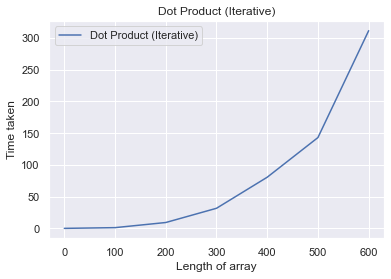

In [4]:
import numpy as np
from timeit import default_timer as timer
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_theme()

def plot_complexity_iterative_dot_product():
    title = 'Dot Product (Iterative)'
    data = {
        'Size of Matrix':[], 
        'time taken': []
    }
    
    for i in range(0, 700,100):
        arr = np.random.randint(0, 1000, (i,i))
        
        start = timer()
        iterative_dot_product(arr,i)
        end = timer()
        
        print(f'Completed Dot product of {i} x {i} matrix in {end-start}s')
        
        data['Size of Matrix'].append(i)
        data['time taken'].append(end-start)
        
    plt.plot(data['Size of Matrix'], data['time taken'], label=title)
    plt.title(title)
    plt.xlabel('Size of Matrix')
    plt.ylabel('Time taken')
    plt.legend()
    
plot_complexity_iterative_dot_product()

### Strassen's Matrix Multiplication

In [1]:
import numpy as np

# assuming A & B are of same order and its a power of 2
def strassen_matrix_multiplication(A, B):
    # base case
    if len(A) == 1:
        return A*B
    else:

        mid = len(A)//2
        # sub-diving the matrices
        a00, a01 = A[:mid, :mid], A[:mid, mid:]
        a10, a11 = A[mid:, :mid], A[mid:, mid:]

        b00, b01 = B[:mid, :mid], B[:mid, mid:]
        b10, b11 = B[mid:, :mid], B[mid:, mid:]
        
        # using strassen's formula to solve the sub-problems recursively
        m1 = strassen_matrix_multiplication(a00+a11, b00+b11)
        m2 = strassen_matrix_multiplication(a10+a11, b00)
        m3 = strassen_matrix_multiplication(a00,b01-b11)
        m4 = strassen_matrix_multiplication(a11,b10-b00)
        m5 = strassen_matrix_multiplication(a00+a01,b11)
        m6 = strassen_matrix_multiplication(a10-a00,b00+b01)
        m7 = strassen_matrix_multiplication(a01-a11,a10+a11)
        
        return np.hstack((np.vstack((m1+m4-m5+m7,m3+m5)), np.vstack((m2+m4, m1+m3-m2+m6))))

    
a = np.array([[1,2],[2,1]])
strassen_matrix_multiplication(a,a)

array([[5, 4],
       [4, 5]])

In [15]:
import numpy as np
%timeit strassen_matrix_multiplication(np.random.randint(0,1000,(256,256)), np.random.randint(0,1000,(256,256))) #around 65k elements

55.6 s ± 5.03 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


Completed (iterative) Dot product of 1 x 1 matrix in 1.1200000017197453e-05s
Completed (iterative) Dot product of 2 x 2 matrix in 1.8299999965165625e-05s
Completed (iterative) Dot product of 4 x 4 matrix in 8.800000000519503e-05s
Completed (iterative) Dot product of 8 x 8 matrix in 0.0006071000000247295s
Completed (iterative) Dot product of 16 x 16 matrix in 0.00611069999990832s
Completed (iterative) Dot product of 32 x 32 matrix in 0.04809160000013435s
Completed (iterative) Dot product of 64 x 64 matrix in 0.2968120000000454s
Completed (iterative) Dot product of 128 x 128 matrix in 2.4884049999998297s
Completed (iterative) Dot product of 256 x 256 matrix in 18.93759080000018s
Completed (iterative) Dot product of 512 x 512 matrix in 190.54295939999997s
Completed (Strassen) Dot product of 1 x 1 matrix in 7.60000011723605e-06s
Completed (Strassen) Dot product of 2 x 2 matrix in 3.489999994599202e-05s
Completed (Strassen) Dot product of 4 x 4 matrix in 0.0001664000001255772s
Completed (St

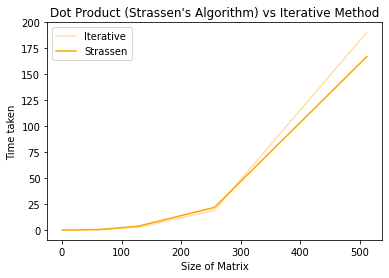

In [17]:
import numpy as np
from timeit import default_timer as timer
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_theme()

def plot_complexity_iterative_dot_product():
    title = 'Dot Product (Iterative)'
    data = {'Size of Matrix':[], 'time taken': []}
    for i in [2**i for i in range(0,10)]:
        arr = np.random.randint(0, 1000, (i,i))
        start = timer()
        iterative_dot_product(arr,i)
        end = timer()          
        print(f'Completed (iterative) Dot product of {i} x {i} matrix in {end-start}s')
        data['Size of Matrix'].append(i)
        data['time taken'].append(end-start)
        
    plt.plot(data['Size of Matrix'], data['time taken'], color='navajowhite', label="Iterative");

    
def plot_complexity_strassen_dot_product():
    title = 'Dot Product (Strassen\'s Algorithm) vs Iterative Method'
    data = {
        'Size of Matrix':[], 
        'time taken': []
    }
    
    for i in [2**i for i in range(0,10)]:
        arr = np.random.randint(0, 1000, (i,i))
        
        start = timer()
        iterative_dot_product(arr,i)b
        end = timer()
        
        print(f'Completed (Strassen) Dot product of {i} x {i} matrix in {end-start}s')
        
        data['Size of Matrix'].append(i)
        data['time taken'].append(end-start)
    plt.plot(data['Size of Matrix'], data['time taken'], color='orange', label="Strassen");
    plt.title(title)
    plt.xlabel('Size of Matrix')
    plt.ylabel('Time taken')
    plt.legend()


plot_complexity_iterative_dot_product()
plot_complexity_strassen_dot_product()

## Fractional Knapsack Problem

In [79]:
class ItemValue:
    def __init__(self, wt, val, ind):
        self.wt = wt
        self.val = val
        self.ind = ind
        self.cost = val // wt
 
    def __lt__(self, other):
        return self.cost < other.cost
 
# Greedy Approach
 
 
class FractionalKnapSack:
 
    # O(n log n)
    @staticmethod
    def getMaxValue(wt, val, capacity):
        iVal = []
        for i in range(len(wt)):
            iVal.append(ItemValue(wt[i], val[i], i))
        
#         print(iVal)
        # sorting items by value
        iVal.sort(reverse=True)
 
        totalValue = 0
        for i in iVal:
            curWt = int(i.wt)
            curVal = int(i.val)
            if capacity - curWt >= 0:
                capacity -= curWt
                totalValue += curVal
            else:
                fraction = capacity / curWt
                totalValue += curVal * fraction
                capacity = int(capacity - (curWt * fraction))
                break
        return totalValue
 
 

wt = [2, 3, 5, 7, 1, 4, 1]
val = [10, 5, 15, 7, 6, 18, 3]
capacity = 15
 
maxValue = FractionalKnapSack.getMaxValue(wt, val, capacity)
print("Maximum value in Knapsack =", maxValue)

Maximum value in Knapsack = 55.333333333333336


In [70]:
import numpy as np
%timeit FractionalKnapSack.getMaxValue(np.random.randint(1,1000, 10000), np.random.randint(0,1000, 10000), np.random.randint(0,10000,1))

33.5 ms ± 2.7 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Prim's Algorithm

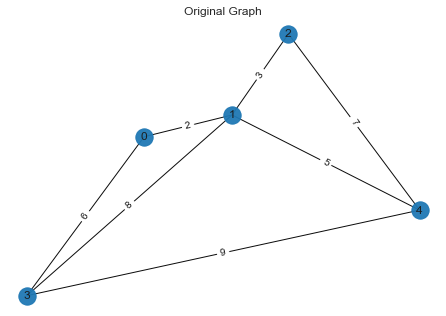

Edge 	Weight
0 - 1 	 2
1 - 2 	 3
0 - 3 	 6
1 - 4 	 5
[(0, 1), (1, 2), (0, 3), (1, 4)]


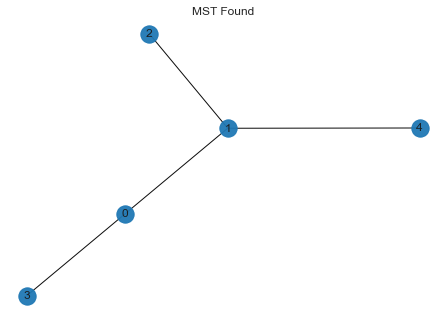

In [31]:
import networkx as nx
from matplotlib import pyplot as plt

class Graph():

    def __init__(self, vertices):
        self.V = vertices
        self.graph = [[0 for column in range(vertices)]
                    for row in range(vertices)]

    # A utility function to print the constructed MST stored in parent[]
    def printMST(self, parent):
        print("Edge \tWeight")
        for i in range(1, self.V):
            print(parent[i], "-", i, "\t", self.graph[i][parent[i]])


    def getMST(self, parent):
        edge_list = []
        for i in range(1, self.V):
            edge_list.append((parent[i], i))
        return edge_list


    def minKey(self, key, mstSet):
        # Initilaize min value, a large value INT_MAX
        min = 99999999

        for v in range(self.V):
            if key[v] < min and mstSet[v] == False:
                min = key[v]
                min_index = v

        return min_index


    # Function to construct and print MST for a graph represented using adjacency matrix representation
    def primMST(self, print_output= True):
        # Key values used to pick minimum weight edge in cut
        key = [99999999] * self.V
        parent = [None] * self.V # Array to store constructed MST
        # Make key 0 so that this vertex is picked as first vertex
        key[0] = 0
        mstSet = [False] * self.V

        parent[0] = -1 # First node is always the root of

        for cout in range(self.V):

            # Pick the minimum distance vertex from
            # the set of vertices not yet processed.
            # u is always equal to src in first iteration
            u = self.minKey(key, mstSet)

            # Put the minimum distance vertex in
            # the shortest path tree
            mstSet[u] = True

            # Update dist value of the adjacent vertices
            # of the picked vertex only if the current
            # distance is greater than new distance and
            # the vertex in not in the shotest path tree
            for v in range(self.V):

                # graph[u][v] is non zero only for adjacent vertices of m
                # mstSet[v] is false for vertices not yet included in MST
                # Update the key only if graph[u][v] is smaller than key[v]
                if self.graph[u][v] > 0 and mstSet[v] == False and key[v] > self.graph[u][v]:
                        key[v] = self.graph[u][v]
                        parent[v] = u

        if print_output:
            self.printMST(parent)

        return self.getMST(parent)




def draw_graph(graph, title= None):
    # positions of each node
#     pos= nx.random_layout(graph)
    pos= nx.kamada_kawai_layout(graph)

    # weights
    weights = nx.get_edge_attributes(graph,'weight')

    # drawing onto canvas
    nx.draw(graph, pos = pos, with_labels = True, edge_color = 'black', width = 1, alpha = 0.95)
    # drawing the weights
    nx.draw_networkx_edge_labels(graph, pos = pos, edge_labels= weights)
    
    plt.title(title)
    # showing diagram
    plt.show()


# using adjency matrix, O(V^2)
# Default Example
def main():
    V = 5
    G = Graph(V)
    
    # default example
    G.graph = [ [0, 2, 0, 6, 0],
                [2, 0, 3, 8, 5],
                [0, 3, 0, 0, 7],
                [6, 8, 0, 0, 9],
                [0, 5, 7, 9, 0]]

#     print("Printing Original graph...")
    g = nx.Graph()
    g = nx.from_numpy_matrix(np.array(G.graph))
    draw_graph(g, title = "Original Graph")

    edge_list = G.primMST()

    print(edge_list)

    # Drawing MST
#     print("\nPrinting MST graph")
    g = nx.Graph()
    g.add_edges_from(edge_list)
    draw_graph(g, title = "MST Found")

    
main()

In [30]:
import networkx as nx
import numpy as np
# edit the size of the graph and compare the avg. time taken
V = 1000

G = Graph(V)
# dense graph
G.graph = nx.to_numpy_matrix(nx.fast_gnp_random_graph(V, 1)).tolist()

%timeit G.primMST(print_output= False)

948 ms ± 77.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Found the MST using Prims Algorithm for graph of 50 nodes solved in 0.0012543999991976307 s
Found the MST using Prims Algorithm for graph of 100 nodes solved in 0.004821600000468607 s
Found the MST using Prims Algorithm for graph of 150 nodes solved in 0.013126199999533128 s
Found the MST using Prims Algorithm for graph of 200 nodes solved in 0.021852200000466837 s
Found the MST using Prims Algorithm for graph of 250 nodes solved in 0.034452300000339164 s
Found the MST using Prims Algorithm for graph of 300 nodes solved in 0.07568339999943419 s
Found the MST using Prims Algorithm for graph of 350 nodes solved in 0.05920049999986077 s


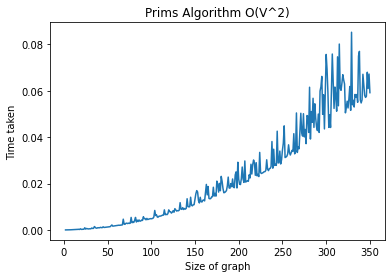

In [7]:
def generate_random_graph(n, random_weights = True):
    """
    Parameter: n = No. of nodes

    Uses networkx's graph generator to create a random graph
    which is then turned to a numpy 2d matrix (adjacency matrix)
    this matrix is then converted to python's 2d list type
    this is then returned
    """
    Graph = nx.fast_gnp_random_graph(n, 1)

    if(random_weights):
        for (u, v) in Graph.edges():
            Graph.edges[u,v]['weight'] = np.random.randint(1,999, dtype=int)

    # in numpy
    graph = nx.to_numpy_matrix(Graph)
    # to list
    graph = graph.tolist()

    return graph

def plot_complexity(stop):
  title = f"Prims Algorithm O(V^2)"
  data = {
      'length of list':[],
      'time taken': []
  }

  # main loop
  for i in range(2, stop+1):
    # setting the no. of nodes for graph
    G = Graph(i)

    # generating the random graph with a edge creation probability of 1 (dense graph)
    G.graph = generate_random_graph(i)

    start = timer()
    edge_list = G.primMST(print_output= False)
    end = timer()

#     print(f"MST edges-list: {edge_list}")
    if i % 50 == 0:
        print(f'Found the MST using Prims Algorithm for graph of {i} nodes solved in {end-start} s')

    data['length of list'].append(i)
    data['time taken'].append(end-start)

  plt.plot(data['length of list'], data['time taken'], label=title)
  plt.title(title)
  plt.xlabel('Size of graph')
  plt.ylabel('Time taken')
  plt.show()


plot_complexity(stop = 350)

## N-Queens Problem

In [18]:
"""
Placing N queens on an NxN chessboard using the backtracking method.
"""
import numpy as np
from matplotlib import pyplot as plt

#Number of queens
N = int(input("Enter the number of queens: "))

# Creating nxn Chessboard Matrix with 0 as default
board = [[0]*N for _ in range(N)]
QUEEN = 1

def is_attack(i, j):
    # queen row and col attack check
    for k in range(0,N):
        if board[i][k] == QUEEN or board[k][j] == QUEEN:
            return True

    # queen diagonal attack check
    for k in range(0,N):
        for l in range(0,N):
            if (k+l==i+j) or (k-l==i-j):
                if board[k][l] == QUEEN:
                    return True

    # not under attack
    return False



def N_queen(n):
    # no queens base case :/
    if n == 0:
        return True

    # row
    for i in range(0,N):
        # col
        for j in range(0,N):
            '''
            checking if we can place a queen here or not.
            Conditions:
                1. is occupied already?
                2. can be placed without being under attack
            If not, then queen will not be placed and we'll back track
            '''
            if ( not(is_attack(i,j)) ) and ( board[i][j]!=1 ):
                # queen placed
                board[i][j] = QUEEN

                #recursive
                if N_queen(n-1)==True:
                    return True

                # for this timeline, the board will be empty
                board[i][j] = 0

    return False


N_queen(N)

# printing each row
for i in board:
    print(i)
    # ♕

Enter the number of queens: 5
[1, 0, 0, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 0, 0, 1]
[0, 1, 0, 0, 0]
[0, 0, 0, 1, 0]


Queens problem of 1 for 1x1 in 1.2099999821657548e-05s
Queens problem of 2 for 2x2 in 7.849999974496313e-05s
Queens problem of 3 for 3x3 in 0.0010951000003842637s
Queens problem of 4 for 4x4 in 0.0013592999998763844s
Queens problem of 5 for 5x5 in 0.0003723999998328509s
Queens problem of 6 for 6x6 in 0.36815740000020014s
Queens problem of 7 for 7x7 in 0.0015788000000611646s
Queens problem of 8 for 8x8 in 8.127417600000172s
Queens problem of 9 for 9x9 in 2.5204342000001816s
Queens problem of 10 for 10x10 in 62.95443759999989s
Queens problem of 11 for 11x11 in 13.038195499999802s


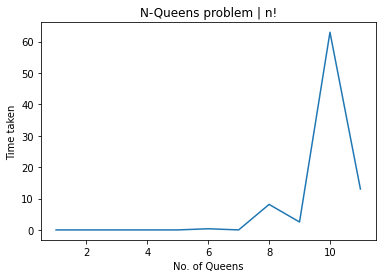

In [19]:
import numpy as np
def plot_complexity(func, stop):
    title = "N-Queens problem | n!"
    data = {
        'length of list':[],
        'time taken': []
    }

    global board, QUEEN, N
    
    for i in range(1, stop+1):
        N = i
        board = np.zeros((N,N), dtype= np.int64)
#         board = [[0]*N for _ in range(N)]
        QUEEN = 1
        
        start = timer()
        N_queen(N)
        end = timer()
        
        
        print(f'Queens problem of {i} for {i}x{i} in {end-start}s')

        data['length of list'].append(i)
        data['time taken'].append(end-start)

    plt.plot(data['length of list'], data['time taken'], label=title)
    plt.title(title)
    plt.xlabel('No. of Queens')
    plt.ylabel('Time taken')
    plt.show()


# Since its worst case time complexity is n!, give small inputs... (<12)
plot_complexity(main, stop = 10)

In [24]:
import numpy as np
N = int(input("No. of queens: "))
board = [[0]*N for _ in range(N)]
QUEEN = 1

%timeit N_queen(N)                  # time taken to solve for 10 queens vs 8 queens jumps up by ~700%!!!

No. of queens: 10
295 µs ± 47.8 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Hamiltonian Cycle

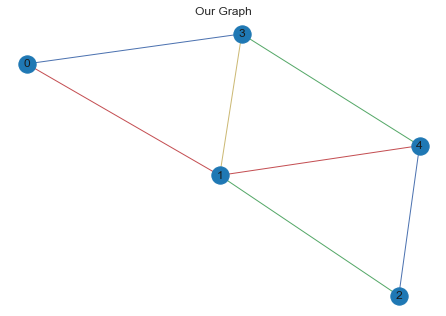

Cycle: [0, 1, 2, 4, 3, 0]


True

In [28]:
# Prints all the hamiltonian paths possible for a given undirected graph
import numpy as np
import networkx as nx
from matplotlib import pyplot as plt


graph = [
   [0, 1, 0, 1, 0],
   [1, 0, 1, 1, 1],
   [0, 1, 0, 0, 1],
   [1, 1, 0, 0, 1],
   [0, 1, 1, 1, 0],
];

NODES = len(graph)
PATH = [];


def displayCycle():
    '''
    Prints the array path, which contains one of the hamiltonian paths
    to complete the path we append the first element
    '''
    PATH.append(PATH[0])
    print(f"Cycle: {PATH}")


def isValid(v, k):
    if graph [ PATH[k-1] ][v] == 0:          # no edge present :(
        return False

    for i in range(0, k):
        if PATH[i] == v:
            return False
    return True


def cycleFound(k):
    if k == NODES:
        if graph[PATH[k-1]][ PATH[0] ] == 1:
            return True
        else:
            return False


    for v in range(1, NODES):
        if isValid(v,k):
            PATH[k] = v
            if cycleFound (k+1) == True:
                return True
            PATH[k] = -1

    return False


def hamiltonianCycle():
    for i in range(0, NODES):
        PATH.append(-1)
    PATH[0] = 0

    if cycleFound(1) == False:
        print("Solution does not exist")
        return False

    displayCycle()
    return True


def draw_graph(graph):
    G = nx.from_numpy_matrix(graph)
    nx.draw(G, with_labels = True, edge_color = ('r', 'b', 'g', 'y') ,width = 1, alpha = 1)
    plt.title("Our Graph")
    plt.show()
    

draw_graph(np.array(graph))    

hamiltonianCycle()

In [ ]:
# Prints all the hamiltonian paths possible for a given undirected graph
from timeit import default_timer as timer
import numpy as np
import networkx as nx
from matplotlib import pyplot as plt

graph = []
NODES = 0
PATH = []

def generate_random_graph(n):
    Graph = nx.fast_gnp_random_graph(n, 1)

    # in numpy
    graph = nx.to_numpy_matrix(Graph)
    # to list
    graph = graph.tolist()

    return graph


def plot_complexity(func, stop):
    title = "Hamiltonian Cycle Problem"
    data = {
        'length of list':[],
        'time taken': []
    }
    for i in range(3, stop):
        global graph, NODES, PATH
        temp = np.random.randint(low = 0, high= 2, size = (i,i), dtype = int)
        graph = temp.tolist()
        NODES = i
        PATH = []

        start = timer()
        func()
        end = timer()

        print(f'Hamiltonian Problem for graph of {i} nodes solved in {end-start}s')

        data['length of list'].append(i)
        data['time taken'].append(end-start)

    plt.plot(data['length of list'], data['time taken'], label=title)
    plt.title(title)
    plt.xlabel('Size of matrix')
    plt.ylabel('Time taken')
    plt.show()



plot_complexity(hamiltonianCycle, 500)